# Machine Learning applied to Space Weather
## Jorge Amaya
### Research Expert

Centre for mathematical Plasma-Astrophysics  
Mathematics Department  
KU Leuven University  
Belgium  

<table><tr>
    <td> <img src="img/euflag.png"/> </td>
    <td> <font size="2" color="grey">The DEEP projects have received funding from the European Union’s Seventh Framework Programme (FP7) for research, technological development and demonstration and the Horion2020 (H2020) funding framework under grant agreement no. FP7-ICT-287530 (DEEP), FP7-ICT-610476 (DEEP-ER) and H2020-FETHPC-754304 (DEEP-EST)</font> </td>
</tr></table>

## Our research team in Leuven, Belgium

<img src="img/cmpapeople.jpeg" style="width: 70%;"/>


At the CmPA we use supercomputers and data from instruments in space and on Earth to study the plasma environment of space.

## What is Space Weather?

Is the study of the effects of solar activity on human life and technology.

The Sun is an active start, constantly ejecting plasma and high energy radiation to space.

<video controls src="img/cme.mp4" />

## Our energy shield

The Earth is protected by its magnetic field, but in times of high solar activity the Earth environment is affected.

We use satellites and simulations to track the solar activity and the conditions of the plasma environment of our planet.

![image](img/magnetosphere.gif)

## Effects on the Earth

This injection of radiaion and plasma changes the plasma environment of our planet, creating the auroras, but also ionizing the top of the atmosphere.

![image](img/aurora.gif)

## Effects on technology
Ionization changes the refractive properties of the atmosphere, which in turn changes the propagation properties of electromagnetic waves. Telecomunication and GPS signals from satellites to the Earth are distorted and can cause problems.

<img src="img/sweffects.jpg" style="width: 60%;"/>

Ionization also induce high voltage currents in long conductive lines, like pipelines and electric grids. In extreme cases they have caused the disruption of electricity: in march 13, 1989, a geomagnetic storm caused a 9-hour outage in Quebec, Canada. [Read more about it here](https://en.wikipedia.org/wiki/March_1989_geomagnetic_storm)

## The data for this tutorial

Today we will work as space scientists!

We will use in-situ measurements of the solar wind conditions upstream of the Earth to forecast the geomagnetic activity on our planet.

## Geomagnetic activity

When plasma in injected in the Earth environment, electrically charged energetic particles orbit the planet, creating a current loop:

<img src="img/Iloop.jpeg" style="width: 40%;"/>

This loop generates a magnetic field that **oposses** the natural magnetic field of the Earth. Geomagnetic storms weaken our magnetic field!

## Dst index

To measure exactly by how much the magnetic field is weakened, we measure the magnetic field strenght at 4 stations near the equator:

<img src="img/dststations.jpg" style="width: 40%;"/>

We build the "Disturbance storm time" (Dst) index by averaging these measurements during one hour.

## Space data: load the Dst index

An example of the Dst index record for the year 2010 is plotted bellow.

Lets start by loading the data using pandas:

In [1]:
import pandas as pd

headers = ['year','day','hour','Bz','Np','V','Dst']
data = pd.read_table("data/omni_2010.dat",
                header=None,
                names=headers,
                delim_whitespace=True,
                skipinitialspace=True)

## Space data: plot the Dst index

Then we can use matplotlib to plot the Dst index for the full year (365 days):

In [2]:
import matplotlib.pyplot as plt

day = data['day'].values
Dst = data['Dst'].values

plt.plot(day, Dst)
plt.xlabel('Day of the year')
plt.ylabel('Dst')
plt.show()

<Figure size 640x480 with 1 Axes>

## Storm categories

The storms in 2010 were not partcularly strong. An example of a strong storm is presented in the figure bellow. Four levels of storm are defined depending on the intensity of the drop in the Dst index.

<img src="img/dst.png"/>

The data presented here has been downloaded from a NASA database called [OMNIweb](http://omniweb.gsfc.nasa.gov).

## Solar wind properties

The figure bellow shows three important parameters measured in the solar wind. We are going to use them to perform the forecasting of the Dst index.

Notice that there are null values, spaces in the data where no measurements are available. In some data these are given the value NaN, but in most they are given a particular token value.

Here 'Np' has null values corresponding to 999.9, 'Bz' has null values of 999.9, and V has null values of 9999.

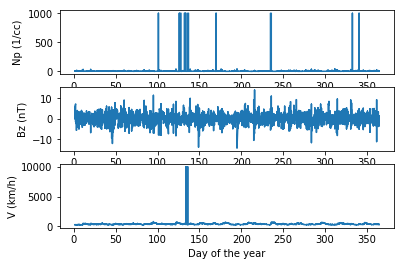

In [3]:
t  = data['day'].values
Np = data['Np'].values
Bz = data['Bz'].values
V  = data['V'].values

plt.subplot(311)
plt.plot(t, Np)
plt.ylabel('Np (1/cc)')
plt.subplot(312)
plt.plot(t, Bz)
plt.ylabel('Bz (nT)')
plt.subplot(313)
plt.plot(t, V)
plt.xlabel('Day of the year')
plt.ylabel('V (km/h)')

plt.show()

## Why is this example interesting to you? Time series

This type of data has a large range of applications. Forecasting the future value of a time series from values historically measured is an application that can be observed in science, industry, finance, medicine and many many others.

Examples could include:
- Prediction the prize of stock shares or economic indices
- Forecasting tomorrows wheather in your city
- Prognosticating the number of cases of flu infections
- Extrapolation of the number of sales of a product
- Forecasting the load of jobs in a cluster
- foretelling the energy consumption in your house

## Pre-processing the data

Most of the time in machine learning is spent understanding and cleaning the data.

Creating scripts that automatically pre-process the data is one of the main goals. **Good and clean data** generally translates into a good machine learning application.

## Time series manipulation

We will create the inputs (x) and the outputs (y) for our machine learning model, by re-organizing the data. The figure bellow shows how a point in time $t$ can be forecasted using data at previous times $(t-8, t-7, ..., t-3)$.

<img src="img/data_partition.png" style="width: 40%;"/>

$n_t$: number of historic points (5 in this example)  
$fcast$: forecasting time (3 in this example)

## Inputs and outputs

We can arrange this data in a *blue* input matrix, and an *orange* output vector.

<img src="img/data_inputoutput.png" style="width: 40%;"/>

## Building the inputs and outputs

In [4]:
import numpy as np

Bz  = data['Bz'].values
Dst = data['Dst'].values

nt = 5
fcast = 3

tau = nt+fcast
m = Bz.shape[0] - tau

Y = np.array(Dst[tau:])
X = np.array([Bz[i:i+nt].flatten() for i in range(m)])

print("X =",X.shape,", Y =", Y.shape)

X = (8752, 5) , Y = (8752,)


## Additional data manipulations

We can also use a different time step between historic data. We call this $dt$ and.

<img src="img/data_dt.png" style="width: 30%;" allign=left/>

In addition we can group toguether multiple different features.

<img src="img/data_multifeatures.png" style="width: 30%;"/>

## Getting rid of nulls

The arrays can contain corrupted or incomplete data. There are multiple methods to deal with such data, including interpolation, copying or modeling. Here, we just get rid of it!

<img src="img/data_nulls.png" style="width: 50%;"/>

In [5]:
Xn = [X[i,:] for i in range(m) if all(j!=999. for j in X[i,:]) and Y[i]!=999]
Xn = np.array(Xn)
print(Xn.shape)

(8752, 5)


## Showing that this actually works

The Bz does not contain nulls, but the velocity does. Lets see if the code above works:

In [6]:
X_V = np.array([V[i:i+nt].flatten() for i in range(m)])
print("X_V =",X_V.shape)

Xn_V = [X_V[i,:] for i in range(m) if all(j!=9999. for j in X_V[i,:]) and Y[i]!=999]

Xn_V = np.array(Xn_V)
print("Previously: Xn = ", Xn.shape, ", Now: X_V", Xn_V.shape)

X_V = (8752, 5)
Previously: Xn =  (8752, 5) , Now: X_V (8740, 5)


There are 12 null entries in the velocity field!

## A dedicated module to process the data

In the current directory we have provided the module omni.py that contains the class omnidata, that performs the above manipulations for you!

In [7]:
import omni
odata = omni.omnidata('data/omni_2010.dat',dt=1,nt=5,fcast=3)
input_features = ['Bz','V','Np']
output_features = ['Dst']
x, y = odata.load(input_features, output_features)
print(x.shape, y.shape)

(8562, 15) (8562, 1)


## Data normalization

Different features have different units and different ranges. Normalization of the inputs and outputs avoids an unbalance on the training of the neural network. The module omni provides a function that performs the following normalization:

$x_{n} = \frac{x-x_{\text mean}}{x_{\text max} - x_{\text min}}$

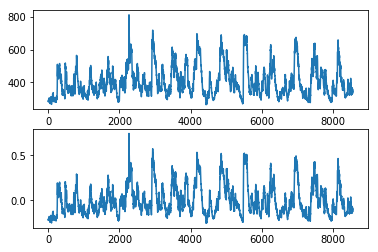

In [8]:
x_n, xmax, xmin, xmean = odata.normalize(0,x)
y_n, ymax, ymin, ymean = odata.normalize(0,y)
plt.subplot(211)
plt.plot(x[:,1])
plt.subplot(212)
plt.plot(x_n[:,1])
plt.show()

## Seting appart training and testing data

To verify the accuracy of the machine learning model we keep and independent set of inputs and outputs. From the total number of data points we will use 70% for training and 30% for testing.

In [9]:
ntrain = int(x.shape[0]*0.7)
ntestn = x.shape[0] - ntrain
print(ntrain)
print(ntestn)

xtrain = x_n[:ntrain]
ytrain = y_n[:ntrain]

xtestn = x_n[ntrain:]
ytestn = y_n[ntrain:]

print(xtrain.shape)
print(xtestn.shape)

5993
2569
(5993, 15)
(2569, 15)


## We are ready to build our machine learning model!

We will build a simple Multi-Layer Perceptron. A fully connected forward neural network, depicted in the figure bellow.

<img src="img/mlp.jpg" style="width: 70%;"/>

We are going to use PyTorch to build this model!

## Defining PyTorch tensors

Matrices and vectors that we built during our data pre-processing have to be transformed in PyTorch tensors

In [10]:
import torch

x_train = torch.tensor(xtrain, dtype=torch.float)
y_train = torch.tensor(ytrain, dtype=torch.float)
x_testn = torch.tensor(xtestn, dtype=torch.float)

## Build a model

The method *Sequential* from PyTorch allows to quickly build a multilayer model in just a few lines. Lets create a model with two hidden layers.

In [11]:
import torch.nn as nn
torch.manual_seed(999)
np.random.seed(111)

nin  = x_train.shape[1]
n1   = 30
n2   = 20
nout = 1

layers = []
layers.append(nn.Linear(nin, n1))
layers.append(nn.Sigmoid())
layers.append(nn.Linear(n1,n2))
layers.append(nn.Sigmoid())
layers.append(nn.Linear(n2,nout))

net = nn.Sequential(*layers)
print(net)

Sequential(
  (0): Linear(in_features=15, out_features=30, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=30, out_features=20, bias=True)
  (3): Sigmoid()
  (4): Linear(in_features=20, out_features=1, bias=True)
)


## Defining a loss function and an optimizer

The loss function will tell the model how far it is from the real solution. We will use the classing Mean Squared Error $L = \frac{1}{m} \sum{(y - \hat{y})^2}$.

The optimizer uses the loss function and modifies the weights of the network depending on the specific algorithm requested. The most used method is the Stochastic Gradient Descent method.

In [12]:
loss = nn.MSELoss()
optim = torch.optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

## Seting up the training procedure

We will pass through the data multiple times, adjusting the model at each passage. To simplify the procedure we create a function that performs the main tasks of the trainin:

1. Set all gradients to zero
2. Feed the inputs $x$ to the net to obtain the predictions $\hat{y}$
3. Calculate the loss between $\hat{y}$ and $y$
4. Propagate that error backwards in the net
5. Calculate a new set of weights

In [13]:
def train(model, loss, optim, x_val, y_val):
    optim.zero_grad()
    yhat = model.forward(x_val)
    L = loss.forward(yhat, y_val)
    L.backward()
    optim.step()
    return L.item()

## Finaly set up the main training cycle

We will divide the full training set into smaller chunks called batches. We will use in this example batches of size 200. This will accelerate the training. We will go through the full data 500 times.

In [14]:
import time

batch_size = 200
nepoch = 500

C = []
tbeg = time.time()
for i in range(nepoch):
    cost = 0
    num_batches = ntrain // batch_size
    for k in range(num_batches):
        start, end = k * batch_size, min((k+1)*batch_size, ntrain)
        cost += train(net, loss, optim, x_train[start:end], y_train[start:end])
    C.append(cost/num_batches)
tend = time.time()
print("Training time: %d seconds"%(tend-tbeg))

Training time: 7 seconds


## Minimization of the cost

We created the buffer called C to keep the history of the cost functions during all the 300 epochs

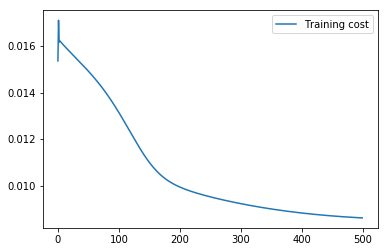

In [15]:
plt.plot(C, label="Training cost")
plt.legend()
plt.show()

## How good is the end result?

Here we compare the testing against the results given by our model. Remember to de-normalize the outputs!

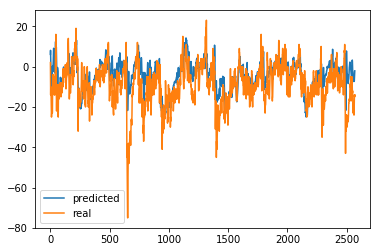

In [16]:
y_pred = net.forward(x_testn).data.numpy()

plt.plot(odata.denorm(y_pred,ymax,ymin,ymean), label='predicted')
plt.plot(odata.denorm(ytestn,ymax,ymin,ymean), label='real')
plt.legend()
plt.show()

The results are not that bad. Could you do better? You can play with different models and activation functions!

## Parallelization

The training can be accelerated by parallelisation, in multiple ways. The most common are:

1. **Model parallelisation:** distribute the components of the model in different processors/gpus. Can use task-based parallelisation.
2. **Data parallelisation:** divide the (x,y) training set in subsets and distribute among different cpus/gpus. Requires a reduction of the gradients from all the ranks.
3. **Hyper-parameter search:** Each cpu/gpu has a full copy of the data, but the model uses different hyper-parameters in each rank. This will accelerate the search for the optimal model.